## Feature Matching

* Feature matching extracts defining key features from an input image (using ideas from corner,edge and contour detection).
* Then using a distance calculation, finds all the matches in a secondary image.
* This means we are no longer required to have an exact copy of the target image.

### 3 Most common methods
* Brute-force matching with ORB Detectors 
* Brute-force matching with SIFT Detectors and ORB Descriptors and Ratio Test
* FLANN based matcher 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
reeses = cv2.imread('Imagess/reeses_puffs.png', 0)

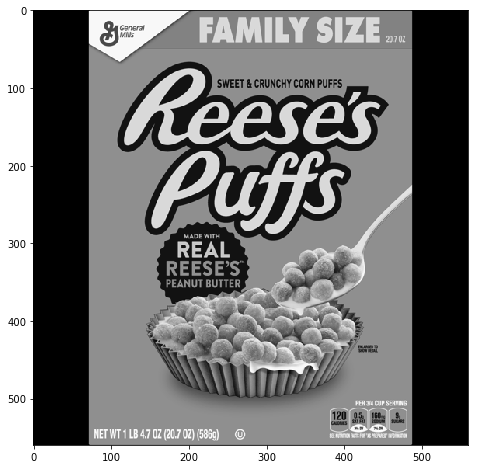

In [4]:
display(reeses)

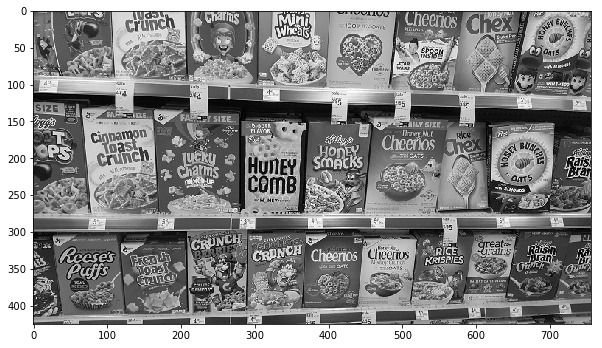

In [5]:
cereals = cv2.imread('Imagess/many_cereals.jpg',0)
display(cereals)

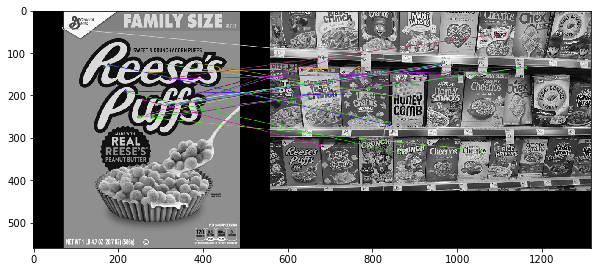

In [13]:
#Brute force detection with ORB Descriptors

orb = cv2.ORB_create() #this is our detector object(detects and computes features)


#Running on target and source image
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None) #None is no mask

#Brute force matching

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) #A bunch of default params

matches = bf.match(des1,des2)

#each match has some attributes
#Distance attribute -> less distance -> better match

#Sorting the matches in the order of their distances
matches = sorted(matches,key=lambda x:x.distance)

reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

display(reeses_matches)



##### :skull_emoji: Welp, that didnt work at all
Probable reasons:
* "Family Size" written on the reezes
* Distorted 2nd image
* Very similar images to the target image

### SIFT DETECTORS (Scale Invarient Feature Transform)


In [19]:
sift = cv2.xfeatures2d.SIFT_create()

#Creating keypoints and descriptors

kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals,None)

#brute force

bf=cv2.BFMatcher()

#Knn matcher finds the K best matches for each descriptor from a query set
matches = bf.knnMatch(des1,des2,k=2)
matches[:5]

[[<DMatch 000001C926E343D0>, <DMatch 000001C9263CD630>],
 [<DMatch 000001C927A2C4F0>, <DMatch 000001C927A2C4D0>],
 [<DMatch 000001C927A2C490>, <DMatch 000001C927A2C510>],
 [<DMatch 000001C927A2C530>, <DMatch 000001C927A2C5B0>],
 [<DMatch 000001C927A2C550>, <DMatch 000001C927A2C5D0>]]

In [ ]:
#Applying the ratio test to check if the two matches are close to each other